# Hypothesis testing


## Analysing differences in student successful graduation probaility

In this part of the analysis we estimate the graduation success probability of two groups of students: olympiad prize holders and students who did not take part in any mathematics or informatics olympiads. We show that there are statistically significant differences.

### Motivation:
In Russian higher education system mathematics and informatics olympiads play a crucial role. They are a primary method of seeking, identifying and developing young talents. Olympiads provide equal opportunities to get access to the best educational facilities to determined schoolchildren of any background and socio-economic status.
University admission offices, on the other hand, compete with each other to get olympiad winners. Thus they provide benefits to them in the admission process.

Here we seek to justify this approach with data and also motivate further analysis of university-level performance of olympiad winners.


### Analysis:
We want to test the null-hypothesis that olympiad winners have the same probability of successfully graduating from university as regularly admitted students.

To this end we conduct an observational study, with the dependant variable being successful graduation and independent variable being the presence of prizes in mathematics and informatics olympiads. Our sampling distribution are graduated and dropped out students of one of Russian universities. This sampling strategy can be considered to be unbiased if we want to infer statements about the population of university students, or, even narrower, about the students of this particular university. Which is the kind of analysis that is of use to an admissions office. 

Our dataset includes **13387**  datapoints of bachelor students who either graduated or dropped out.
We divide this subset of data into two groups - students who were admitted to the study program because they were olympiad prize holders (**olympiad winners, 383 students**) and those who were admitted according to their state exam results (**regularly admitted students, 13004 students**).


### Model:
We model each group of students as a series of independent Bernoulli experiments with unknown success probability $\pi$ that we would like to estimate. To do this we use Bayesian inference.

Let $X_o$ be the subset of $n_o$ datapoints of olympiad winners, $m_o$ of whom graduated successfully. Then $X_r$ - subset of $n_r$ regularly admitted students with $m_r$ successful graduates.
We would like to estimate the probabilities of graduation in both groups $\pi_o$ and $\pi_r$.

#### Estimation
To give a first estimate we use use the sampling ("Monte-Carlo") estimator:

$
\hat{\pi_o} = \frac{1}{n_o}\sum_{x_i \in X_o}{x_i} = \frac{m_o}{n_o} = 0.240
$

$
\hat{\pi_r} = \frac{1}{n_r}\sum_{x_i \in X_r}{x_i} = \frac{m_r}{n_r} = 0.626
$

Which leads us to conjecture that olympiad winners are actually less likely to graduate successfully. We proceed with a more rigorous analysis of this claim.

In a series of Bernoulli experiments with parameter $\pi$ the likelihood of seeing $m$ successes out of $n$ trials is given by:\
$
p(m,n ; \pi) = {n\choose m}(\pi^m (1-\pi)^{n-m})
$

We consider a uniform beta prior $\mathcal{B}(\pi ; 1,1)$ which we find to be a reasonable assumption, as we don't have any knowledge of graduating probabilities before seeing the data.
Posterior distribution over $\pi$ is then Beta distribution $\mathcal{B}(\pi ; m+1,n-m+1)$.

For $m+1>1$ and $n-m+1>1$ the mode is given by $\frac{\alpha-1}{\alpha+\beta-2} = \frac{m}{n}$ which is the maximum aposteriori estimator of $\pi$.

So:\
$\pi_{o-MAP} = \hat{\pi_o} = 0.240$\
$\pi_{r-MAP} = \hat{\pi_r} = 0.626$


#### Confidence intervals
Under our model we can say that with 95% probability $\pi_o$ lies in the interval $[0.20;0.28]$ and $\pi_r$ lies in the interval $[0.618;0.634]$.


#### Hypothesis testing
Now we are ready to test the hypothesis $\mathcal{H_0}$: Olympiad winners have the same probability of successful graduation as students admitted under the regular procedure.
Note, that:

1) Under the null hypothesis $\mathcal{H_0}$ we have $\pi_r = \pi_0 = \pi$ and the likelihood of observing $m_o$ successfully graduated olympiad winners given a particular probability $p(m_o| \pi)$ follows a binomial distribution.

2) The previously achieved Beta-posterior over $\pi$ now acts as a prior ans so $ p(\pi | m_r, n_r) = \mathcal{B}(\pi;m_r+1, (n_r - m_r) + 1)$

3) To find the probability of observing $m_o$ successfully graduated olympiad winners under the null hypothesis we marginalise over $\pi$ $p(m_o | \mathcal{H}_0) = \int p(m_o | \pi) p(\pi | m_r, n_r)\,d\pi$

This results in Beta-binomial distribution.



\begin{equation}
    p(m_o | \mathcal{H}_0)
    = p(m_o | n_o, m_r, n_r) 
    = {n_o \choose m_o}
    \frac{\mathcal{B}(m_r + m_o + 1, (n_r - m_r) + (n_o - m_o) +1)}
    {\mathcal{B}(m_r + 1, (n_r - m_r) + 1)}
\end{equation}


We compute the probability of seeing $m_o$ or even more successfully graduated olympiad winners under the null hypothesis and achieve the p-value of $8.31 \cdot 10^{-52}$ which leads us to reject the null hypothesis.

### Results:
Our analysis leads us to conclude that olympiad winners and regularly admitted students have statistically significant differences in probability of graduating successfully. Moreover, we estimate that olympiad winners actually successfully graduate from the university less often than other students. This surprising phenomenon warrants further study. Possible directions would be 

---

In [92]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import beta, betabinom

os.chdir('..')
os.getcwd()

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('data/preprocessed_data.csv')

/Users/sbokupripeku/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (21,22,23,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [83]:
df.tail()

,ISU_ID,GENDER,INTERNATIONAL,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,EXAMS_SUM,ADMITTED_EXAMS_SUM,PP,ORIGINAL_DOCUMENT,RUSSIAN_LANG,MATH,PHYSICS,CHEMISTRY,FOREIGN_LANG,INFORMATICS,SOCIAL_STUDIES,ADMITTED_SUBJECT_PRIZE,ADMISSION_TYPE,SCHOLARSHIP_TYPE,ADMITTED_SUBJECT_PRIZE_LEVEL,MEAN_STATE_EXAM,MEAN_ADMITTED_STATE_EXAM,SUM_STATE_EXAM,STATE_EXAM_SUBJECT_1,STATE_EXAM_SUBJECT_2,STATE_EXAM_SUBJECT_3,PLAN_1,PLAN_2,PLAN_3,OP_1,OP_2,OP_3,FEE_TYPE_1,FEE_TYPE_2,FEE_TYPE_3,PROGRAM_1,PROGRAM_2,PROGRAM_3,ADMISSION_REC_1,ADMISSION_REC_2,ADMISSION_REC_3,ADMISSION_COND_1,ADMISSION_COND_2,ADMISSION_COND_3,REGION_ID,CRIMEA,DORMITORY_FOR_EXAMS,DORMITORY_FOR_STUDY,MACRO_POSTCODE,CURRENT_STATUS,DROPPED_BEFORE,START_YEAR,LAST_ORDER_DATE,YEAR_EDITION,AGE_AT_START,GROUPS_SEM_1,GROUPS_SEM_2,GROUPS_SEM_3,GROUPS_SEM_4,GROUPS_SEM_5,GROUPS_SEM_6,GROUPS_SEM_7,GROUPS_SEM_8,PLAN_SEM_1,PLAN_SEM_2,PLAN_SEM_3,PLAN_SEM_4,PLAN_SEM_5,PLAN_SEM_6,PLAN_SEM_7,PLAN_SEM_8,OP_SEM_1,OP_SEM_2,OP_SEM_3,OP_SEM_4,OP_SEM_5,OP_SEM_6,OP_SEM_7,OP_SEM_8,FAC_SEM_1,FAC_SEM_2,FAC_SEM_3,FAC_SEM_4,FAC_SEM_5,FAC_SEM_6,FAC_SEM_7,FAC_SEM_8,INTERRUPT_SEM_1,INTERRUPT_SEM_2,INTERRUPT_SEM_3,INTERRUPT_SEM_4,INTERRUPT_SEM_5,INTERRUPT_SEM_6,INTERRUPT_SEM_7,INTERRUPT_SEM_8,HONS_TARGET,DROPPED_TARGET,MARKS_MEAN_SEM_1,MARKS_MEAN_SEM_2,MARKS_MEAN_SEM_3,MARKS_MEAN_SEM_4,MARKS_MEAN_SEM_5,MARKS_MEAN_SEM_6,MARKS_MEAN_SEM_7,MARKS_MEAN_SEM_8,DEBTS_NUMBER_SEM_1,DEBTS_NUMBER_SEM_2,DEBTS_NUMBER_SEM_3,DEBTS_NUMBER_SEM_4,DEBTS_NUMBER_SEM_5,DEBTS_NUMBER_SEM_6,DEBTS_NUMBER_SEM_7,DEBTS_NUMBER_SEM_8,PROGRAM,ADMISSION_COND,NATIONALITY_Белоруссия,NATIONALITY_Вьетнам,NATIONALITY_КНР,NATIONALITY_Казахстан,NATIONALITY_Киргизия,NATIONALITY_Российская Федерация,NATIONALITY_Таджикистан,NATIONALITY_Туркмения,NATIONALITY_Узбекистан,NATIONALITY_Украина,NATIONALITY_другая страна,MACRO_BIRTH_PLACE_архангельск и ао,MACRO_BIRTH_PLACE_белоруссия,MACRO_BIRTH_PLACE_волгоград и во,MACRO_BIRTH_PLACE_воронеж и во,MACRO_BIRTH_PLACE_вьетнам,MACRO_BIRTH_PLACE_другая страна,MACRO_BIRTH_PLACE_другой город (РФ),MACRO_BIRTH_PLACE_екатеринбург и со,MACRO_BIRTH_PLACE_ижевск и ио,MACRO_BIRTH_PLACE_иркутс и ио,MACRO_BIRTH_PLACE_казань и рт,MACRO_BIRTH_PLACE_казахстан,MACRO_BIRTH_PLACE_киргизия,MACRO_BIRTH_PLACE_кнр,MACRO_BIRTH_PLACE_красноярск и кк,MACRO_BIRTH_PLACE_москва и мо,MACRO_BIRTH_PLACE_мурманск и мо,MACRO_BIRTH_PLACE_нижний новгород и но,MACRO_BIRTH_PLACE_новосибирск и но,MACRO_BIRTH_PLACE_оренбург и оо,MACRO_BIRTH_PLACE_пермь и пк,MACRO_BIRTH_PLACE_петрозаводск и рк,MACRO_BIRTH_PLACE_ростов-на-дону и ро,MACRO_BIRTH_PLACE_самара и со,MACRO_BIRTH_PLACE_санкт-петербург и ло,MACRO_BIRTH_PLACE_саратов и со,MACRO_BIRTH_PLACE_таджикистан,MACRO_BIRTH_PLACE_томск и то,MACRO_BIRTH_PLACE_туркмения,MACRO_BIRTH_PLACE_узбекистан,MACRO_BIRTH_PLACE_украина,MACRO_BIRTH_PLACE_уфа и рб,MACRO_BIRTH_PLACE_челябинск и чо
20848,265000,1,0.0,ЕГЭ,Математика,Информатика,Русский язык,88.0,100.0,98.0,286.0,286.0,Нет,Да,98.0,88.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,Серебряный ЕГЭ,NaN,95.33,95.33,286.0,88.0,100.0,98.0,10555.0,10558.0,10556.0,Информатика и программирование,Системное и прикладное программное обеспечение,Вычислительные системы и сети,Из федерального бюджета,Из федерального бюджета,Из федерального бюджета,01.03.02,09.03.04,09.03.01,1.0,NaN,NaN,по общему конкурсу,по общему конкурсу,по общему конкурсу,78.0,0.0,0.0,0.0,195.0,обучен,0.0,2018-09-01,2021-09-01,2022-07-01,18.0,M3135,M3135,M3235,M32351,M33351,M33351,M34351,NaN,39640.0,39640.0,45141.0,45141.0,48767.0,48767.0,51557.0,NaN,Информатика и программирование,Информатика и программирование,Информатика и программирование,Информатика и программирование,Информатика и программирование,Информатика и программирование,Информатика и программирование,NaN,факультет информационных технологий и программ...,факультет информационных технологий и программ...,факультет информационных технологий и программ...,факультет информационных технологий и программ...,факу

In [10]:
df.shape

(20853, 164)

In [63]:
# Students who either graduated or dropped out
finished_students = df[df.DROPPED_TARGET.notna()]
finished_students.shape

(13387, 164)

In [ ]:
# Find olympiad and regular subsets of all students who either graduated or dropped out

In [60]:
# Translation: "100 points for olympiad"
olympiad_students = finished_students[finished_students.ADMISSION_TYPE == "100 баллов за олимпиаду"]

In [64]:
regular_students = finished_students[finished_students.ADMISSION_TYPE != "100 баллов за олимпиаду"]

In [74]:
n_o = olympiad_students.shape[0]
# Successfully graduated (not dropped out)
m_o = olympiad_students[olympiad_students.DROPPED_TARGET == 0.0].shape[0]

In [78]:
m_o, n_o

(92, 383)

In [76]:
n_r = regular_students.shape[0]
# Successfully graduated (not dropped out)
m_r = regular_students[regular_students.DROPPED_TARGET == 0.0].shape[0]

In [77]:
m_r, n_r

(8143, 13004)

#### Monte carlo (and also MAP) estimators

In [81]:
pi_hat_o = m_o / n_o
pi_hat_o

0.2402088772845953

In [82]:
pi_hat_r = m_r / n_r
pi_hat_r

0.6261919409412489

#### Plotting posterior distributions

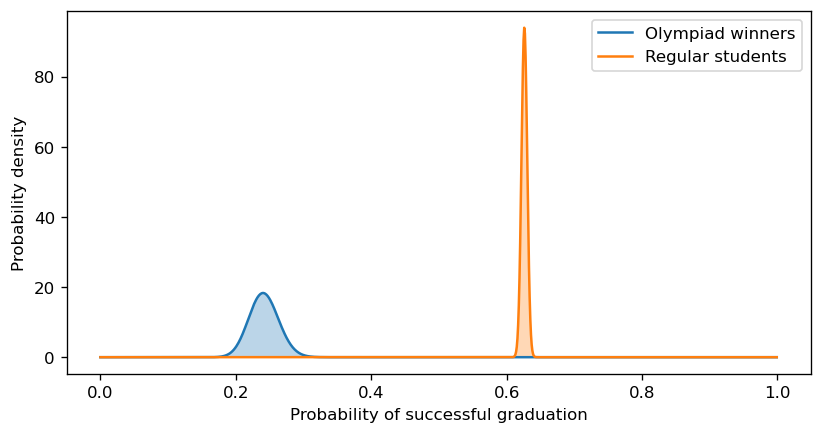

In [231]:
fig,ax = plt.subplots(1,1,sharex=True, figsize=(8, 4), dpi=120)

x = np.arange(0, 1, 0.001)

pi_o = beta(a=m_o+1, b=n_o-m_o+1)
pi_o_pdf = pi_o.pdf(x)
ax.plot(x, pi_o_pdf, label='Olympiad winners')
ax.fill_between(x, pi_o_pdf, alpha=0.3)

pi_r = beta(a=m_r+1, b=n_r-m_r+1)
pi_r_pdf = pi_r.pdf(x)
ax.plot(x, pi_r_pdf, label='Regular students')
ax.fill_between(x, pi_r_pdf, alpha=0.3)



ax.set_xlabel('Probability of successful graduation')
ax.set_ylabel('Probability density')

plt.legend()
plt.show();



#### Confidence intervals

In [188]:
pi_o.interval(alpha=0.95)

(0.20016758363352358, 0.2854921801629499)

In [189]:
pi_r.interval(alpha=0.95)

(0.6178396938641775, 0.634468623820766)

#### Hypothesis testing

In [239]:
# Posterior on number of successfully graduated olympiad winners under the H_o:  
m_o_posterior_h_o = betabinom(n=n_o, a=m_r+1, b=n_r-m_r+1)

In [247]:
p_value = m_o_posterior_h_o.cdf(m_o);
p_value

8.310539185167955e-52

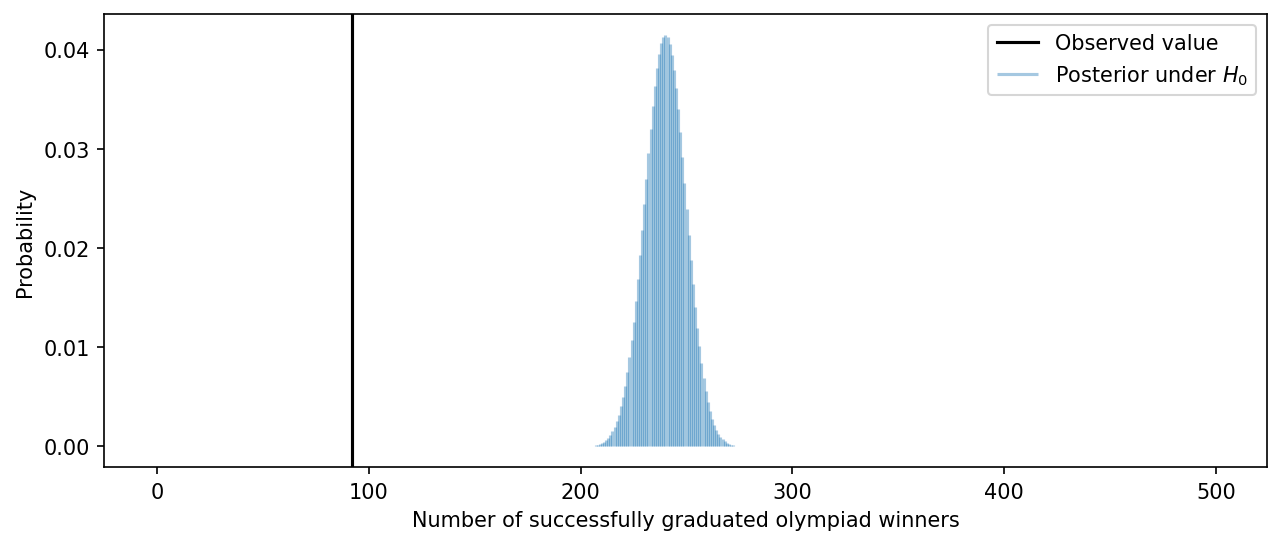

In [267]:
fig,ax = plt.subplots(1,1, figsize=(10, 4),dpi=150)
ax.vlines(x,0,m_o_posterior_h_o.pmf(x), alpha=0.4, label='Posterior under $H_0$')
ax.axvline(m_o,color='k', label='Observed value');
ax.set_xlabel('Number of successfully graduated olympiad winners')
ax.set_ylabel('Probability')
plt.legend();
plt.show()